Predict the 2021 Residential House Sales Prices in Durham, NC

In [1]:
# Libraries for Data Manipulation and Profiling
import pandas as pd
import numpy as np

# Libraries for Machine Learning
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, BayesianRidge, HuberRegressor
from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
#from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

# Libraries for Metrics
from sklearn.metrics import roc_auc_score, mean_squared_error, r2_score

# Libraries for Graphics
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# Libraries for Serialization and Miscellaneous
import math
import pickle
import optuna

## Import Data

In [2]:
df = pd.read_csv('Durham_homes_sold_2021_YTD.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4585 entries, 0 to 4584
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Subdivision               4585 non-null   object 
 1   Total Living Area SqFt    4585 non-null   object 
 2   Year Built                4585 non-null   int64  
 3   Bedrooms                  4585 non-null   int64  
 4   Full Baths                4585 non-null   int64  
 5   Half Baths                4585 non-null   int64  
 6   Property Type             4585 non-null   object 
 7   List Price                4585 non-null   object 
 8   Sold Price                4585 non-null   object 
 9   Acres                     4585 non-null   object 
 10  Approx Lot SqFt           4585 non-null   object 
 11  Approximate Acres         4585 non-null   float64
 12  Basement                  4585 non-null   object 
 13  Construction Type         4585 non-null   object 
 14  Days On 

In [4]:
# Calculate the number of unique values for each column
nunique_values = df.nunique()

# Create a list of unique values for each column
unique_values = [', '.join(map(str, df[col].unique())) for col in df.columns]

# Calculate the count of NaN values for each column
count_nan = df.isna().sum()

# Calculate the percentage of NaN values for each column
nan_percentage = (count_nan / len(df)) * 100

# Get the data type for each column
dtype_values = df.dtypes

# Create a summary DataFrame with the desired information
df_summary = pd.DataFrame({
    'columns': df.columns,
    'nunique': nunique_values.values,
    'unique': unique_values,
    'dtype': dtype_values.values,
    'count_nan': count_nan.values,
    'nan_percentage': nan_percentage.values
})

# Display the result
#print(df_summary)


In [5]:
df_summary

,columns,nunique,unique,dtype,count_nan,nan_percentage
0,Subdivision,646,"The Hills at Southpoint, Orchard Lake, Not in ...",object,0,0.000000
1,Total Living Area SqFt,2030,"6,079, 1,532, 4,494, 1,914, 1,681, 2,384, 2,47...",object,0,0.000000
2,Year Built,117,"2010, 2002, 1910, 1997, 2005, 1962, 1998, 1991...",int64,0,0.000000
3,Bedrooms,9,"6, 3, 4, 2, 5, 1, 8, 0, 7",int64,0,0.000000
4,Full Baths,7,"5, 2, 4, 1, 3, 6, 7",int64,0,0.000000
5,Half Baths,4,"1, 0, 2, 3",int64,0,0.000000
6,Property Type,4,"Detached, Attached, Condo, Manufactured",object,0,0.000000
7,List Price,1573,"$819,900, $235,000, $1,153,000, $268,500, $225...",object,0,0.000000
8,Sold Price,1825,"$798,000, $243,000, $1,153,000, $249,500, $230...",object,0,0.000000
9,Acres,8,".26-.5 Acres, 0-.25 Acres, .76-.99 Acres, .51-...",object,0,0.000000


## Clean the Data

In [6]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [7]:
df = df.drop_duplicates()

In [8]:
# Replace '$' and ',' in multiple columns
cols_to_replace = ['list_price', 'sold_price', 'total_living_area_sqft', 'approx_lot_sqft']

df[cols_to_replace] = df[cols_to_replace].replace({'\$': '', ',': ''}, regex=True)

# Convert columns to numeric type if necessary
df[cols_to_replace] = df[cols_to_replace].apply(pd.to_numeric, errors='coerce')


<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipykernel_75779/403825619.py:4: SyntaxWarning: invalid escape sequence '\$'
  df[cols_to_replace] = df[cols_to_replace].replace({'\$': '', ',': ''}, regex=True)


In [9]:
df['list_date'] = pd.to_datetime(df['list_date'])
df['closing_date'] = pd.to_datetime(df['closing_date'])

for c in ['list_date', 'closing_date']: 
    df[c] = pd.to_datetime(df[c])

In [10]:
df['list_year'] = df['list_date'].dt.year
df['year_built'] = df['year_built'].astype(int)
df['age_house'] = df['list_year'] - df['year_built']

In [11]:
df['days_on_market'] = (df['closing_date'] - df['list_date']).dt.days
df['closing_month'] = df['closing_date'].dt.month
df['closing_day'] = df['closing_date'].dt.day


In [12]:
# Calculate discount_price
df['discount_price'] = np.where(
    df['list_price'] == df['sold_price'],  # Condition: if list_price is equal to sold_price
    0,  # Value is 0 if the condition is met
    (df['list_price'] - df['sold_price']) / df['sold_price']  # Calculate the value if the condition is not met
)


In [13]:
del df['list_year']
del df['closing_date']
del df['list_date']


In [14]:
df['fireplace'] = df['fireplace'].replace({'4+':'4'})
df['fireplace'].astype(int)
df['fireplace'].value_counts()

fireplace
1    2677
0    1722
2     143
3      28
4      14
Name: count, dtype: int64

In [15]:
df['zip'] = df['zip'].str[:5]
df['zip'].astype(int)
df['zip'].unique()

array(['27713', '27701', '27712', '27705', '27703', '27707', '27704',
       '27560', '27702', '27517', '27714', '27519'], dtype=object)

In [16]:
del df['city']

### Handle Missing Values

In [17]:
df.isna().sum()

subdivision                    0
total_living_area_sqft         0
year_built                     0
bedrooms                       0
full_baths                     0
half_baths                     0
property_type                  0
list_price                     0
sold_price                     0
acres                          0
approx_lot_sqft                0
approximate_acres              0
basement                       0
construction_type              0
days_on_market                 0
fireplace                      0
garage                         0
hoa_1_fees_required         1553
internet_listing               0
master_bedroom_1st_floor       0
new_construction               0
total_baths                    0
zip                            0
inside_city                    0
hoa_y/n                      976
elementary_school_1           55
high_school_1                 55
middle_school_1               54
restrictive_covenants          0
age_house                      0
closing_mo

In [18]:
df['hoa_1_fees_required'].value_counts()

hoa_1_fees_required
Yes    2842
No      189
Name: count, dtype: int64

In [19]:
df['hoa_y/n'].value_counts()

hoa_y/n
Yes    2552
No     1056
Name: count, dtype: int64

In [20]:
# Fill NaN values in 'hoa_1_fees_required' with values from 'hoa_y/n'
df['hoa_1_fees_required'].fillna(df['hoa_y/n'], inplace=True)

# Set 'hoa_1_fees_required' to 'No' if 'subdivision' is 'Not in a Subdivision'
df['hoa_1_fees_required'] = np.where(df['subdivision'] == 'Not in a Subdivision', 'No', df['hoa_1_fees_required'])

# Get a list of subdivisions with HOA fees as 'Yes' and 'No'
hoa_yes = df[df['hoa_1_fees_required'] == 'Yes']['subdivision'].unique()
hoa_no = df[df['hoa_1_fees_required'] == 'No']['subdivision'].unique()

# Fill NaN values based on conditions in 'hoa_1_fees_required' and 'subdivision'
df['hoa_1_fees_required'] = np.where(
    df['hoa_1_fees_required'].isna() & df['subdivision'].isin(hoa_yes),
    'Yes', df['hoa_1_fees_required']
)
df['hoa_1_fees_required'] = np.where(
    df['hoa_1_fees_required'].isna() & df['subdivision'].isin(hoa_no),
    'No', df['hoa_1_fees_required']
)

# If any NaN values remain, set 'No' as the default value
df['hoa_1_fees_required'].fillna('No', inplace=True)


/tmp/ipykernel_75779/2084976726.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['hoa_1_fees_required'].fillna(df['hoa_y/n'], inplace=True)
/tmp/ipykernel_75779/2084976726.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

In [21]:
df['hoa_1_fees_required'].isna().sum()

0

In [22]:
del df['hoa_y/n']
del df['list_price']

In [23]:
df = df.fillna(-1)

In [24]:
df.isna().sum()

subdivision                 0
total_living_area_sqft      0
year_built                  0
bedrooms                    0
full_baths                  0
half_baths                  0
property_type               0
sold_price                  0
acres                       0
approx_lot_sqft             0
approximate_acres           0
basement                    0
construction_type           0
days_on_market              0
fireplace                   0
garage                      0
hoa_1_fees_required         0
internet_listing            0
master_bedroom_1st_floor    0
new_construction            0
total_baths                 0
zip                         0
inside_city                 0
elementary_school_1         0
high_school_1               0
middle_school_1             0
restrictive_covenants       0
age_house                   0
closing_month               0
closing_day                 0
discount_price              0
dtype: int64

In [25]:
df = df.replace('Yes', 1)
df = df.replace('No', 0)

/tmp/ipykernel_75779/3728064491.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('No', 0)


In [26]:
categorical_cols = df.select_dtypes(exclude=['number']).columns.tolist()
#categorical = list(df.dtypes[df.dtypes == 'object'].index)
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

In [27]:
categorical_cols

['subdivision',
 'property_type',
 'acres',
 'construction_type',
 'fireplace',
 'zip',
 'elementary_school_1',
 'high_school_1',
 'middle_school_1']

In [28]:
numerical_cols

['total_living_area_sqft',
 'year_built',
 'bedrooms',
 'full_baths',
 'half_baths',
 'sold_price',
 'approx_lot_sqft',
 'approximate_acres',
 'basement',
 'days_on_market',
 'garage',
 'hoa_1_fees_required',
 'internet_listing',
 'master_bedroom_1st_floor',
 'new_construction',
 'total_baths',
 'inside_city',
 'restrictive_covenants',
 'age_house',
 'closing_month',
 'closing_day',
 'discount_price']

In [29]:
df[numerical_cols].describe().round(3)

,total_living_area_sqft,year_built,bedrooms,full_baths,half_baths,sold_price,approx_lot_sqft,approximate_acres,basement,days_on_market,...,internet_listing,master_bedroom_1st_floor,new_construction,total_baths,inside_city,restrictive_covenants,age_house,closing_month,closing_day,discount_price
count,4584.000,4584.000,4584.000,4584.000,4584.000,4584.000,4584.000,4584.000,4584.000,4584.000,...,4584.000,4584.00,4584.000,4584.000,4584.000,4584.000,4584.000,4584.000,4584.000,4584.000
mean,1959.904,1993.251,3.146,2.132,0.575,378894.778,13550.372,0.311,0.080,79.317,...,0.985,0.51,0.205,2.707,0.899,0.697,27.527,5.814,17.213,-0.036
std,822.864,27.481,0.798,0.670,0.520,202092.678,42664.248,0.979,0.271,91.277,...,0.123,0.50,0.404,0.878,0.301,0.459,27.551,2.700,8.841,0.070
min,240.000,1890.000,0.000,1.000,0.000,55000.000,0.000,0.000,0.000,0.000,...,0.000,0.00,0.000,1.000,0.000,0.000,-2.000,1.000,1.000,-0.463
25%,1431.000,1978.000,3.000,2.000,0.000,268061.500,3528.360,0.081,0.000,34.000,...,1.000,0.00,0.000,2.000,1.000,0.000,3.000,4.000,10.000,-0.079
50%,1819.000,2002.000,3.000,2.000,1.000,337717.500,7710.120,0.177,0.000,45.000,...,1.000,1.00,0.000,3.000,1.000,1.000,19.000,6.000,17.000,-0.023
75%,2300.000,2017.000,4.000,2.000,1.000,432500.000,13068.000,0.300,0.000,79.000,...,1.000,1.00,0.000,3.000,1.000,1.000,43.000,8.000,25.000,0.000
max,9582.000,2021.000,8.000,7.000,3.000,3500000.000,1907928.000,43.800,1.000,1604.000,...,1.000,1.00,1.000,9.000,1.000,1.000,131.000,10.000,31.000,0.562


<Axes: xlabel='sold_price', ylabel='Count'>

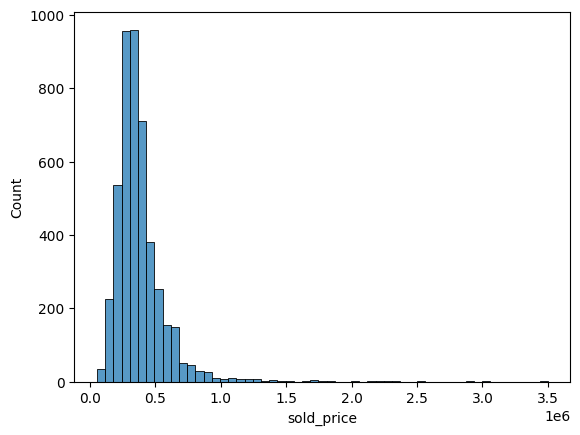

In [30]:
sns.histplot(df.sold_price, bins=55)

<Axes: xlabel='sold_price', ylabel='Count'>

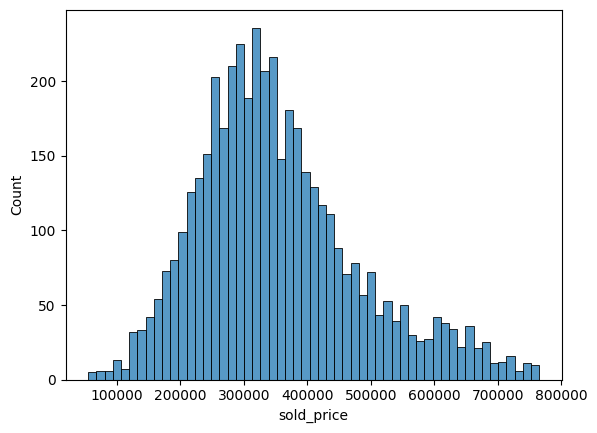

In [31]:
sns.histplot(df.sold_price[df.sold_price < 770000], bins=55)

<Axes: >

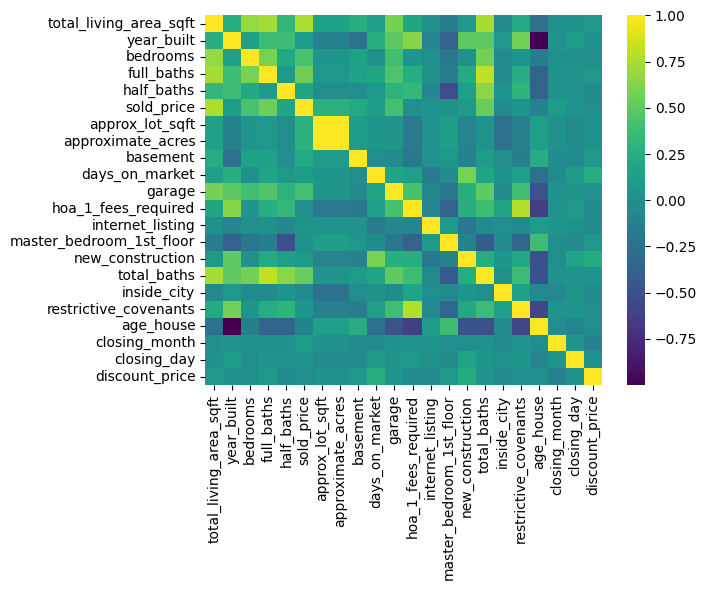

In [32]:
corr = df[numerical_cols].corr()

sns.heatmap(corr, cmap='viridis')

In [33]:
price_logs = np.log1p(df.sold_price)

<Axes: xlabel='sold_price', ylabel='Count'>

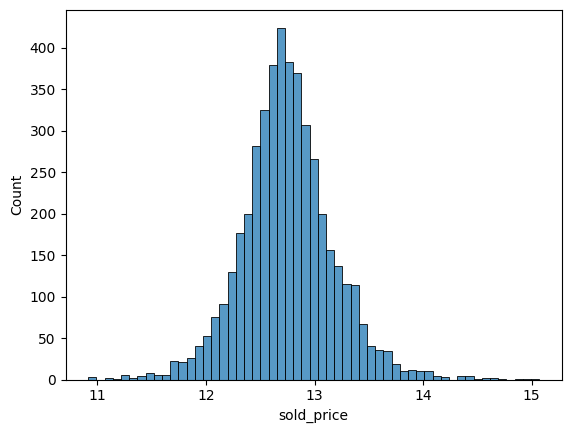

In [34]:
sns.histplot(price_logs, bins=55)

## Split the Data

In [35]:
df_copy = df.copy()

In [36]:
# Apply LabelEncoder to each categorical column
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df_copy[col].astype(str))  # Convert to string to avoid errors
    label_encoders[col] = le  # Store the LabelEncoder for reference or inverse transformation


In [37]:
df_full_train, df_test = train_test_split(df_copy, test_size=0.2, shuffle=False)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, shuffle=False)

In [38]:
df_full_train = df_full_train.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [39]:
y_full_train = np.log1p(df_full_train.sold_price.values)
y_train = np.log1p(df_train.sold_price.values)
y_val = np.log1p(df_val.sold_price.values)
y_test = np.log1p(df_test.sold_price.values)

In [40]:
del df_full_train['sold_price']
del df_train['sold_price']
del df_val['sold_price']
del df_test['sold_price']

## Train the Models

In [41]:
# Function to train a model and calculate scores
def train_and_evaluate_model(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    predictions = model.predict(X_val)
    
    # Evaluate metrics
    mse = mean_squared_error(y_val, predictions)
    r2 = r2_score(y_val, predictions)
    
    return mse, r2


In [42]:
# Convert DataFrame to dict and transform features
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)


In [43]:
# List of models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "Lasso Regression": Lasso(),
    "Ridge Regression": Ridge(),
    "ElasticNet": ElasticNet(),
    "K-Neighbors": KNeighborsRegressor(),
    "Support Vector Regression": SVR(),
    "Bayesian Ridge": BayesianRidge(),
    "Huber Regressor": HuberRegressor(),
    "Extra Trees": ExtraTreesRegressor(),
    "CatBoost": CatBoostRegressor(verbose=0),
    "LightGBM": LGBMRegressor()
}

# Evaluate each model
for name, model in models.items():
    try:
        mse, r2 = train_and_evaluate_model(model, X_train, y_train, X_val, y_val)
        print(f"{name} - MSE: {mse:.5f}, R2: {r2:.5f}")
    except Exception as e:
        print(f"Error in {name}: {e}")


Linear Regression - MSE: 0.03975, R2: 0.76056
Decision Tree - MSE: 0.06980, R2: 0.57956
Random Forest - MSE: 0.03210, R2: 0.80666
Gradient Boosting - MSE: 0.02908, R2: 0.82486
AdaBoost - MSE: 0.05498, R2: 0.66883
Lasso Regression - MSE: 0.07243, R2: 0.56369
Ridge Regression - MSE: 0.03037, R2: 0.81705
ElasticNet - MSE: 0.07241, R2: 0.56380
K-Neighbors - MSE: 0.07432, R2: 0.55235
Support Vector Regression - MSE: 0.07660, R2: 0.53857
Bayesian Ridge - MSE: 0.03006, R2: 0.81895
Huber Regressor - MSE: 0.07204, R2: 0.56604
Extra Trees - MSE: 0.02881, R2: 0.82645
CatBoost - MSE: 0.02395, R2: 0.85571
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000591 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1721
[LightGBM] [Info] Number of data points in the train set: 2750, number of used features: 97
[LightGBM] [Info] Start training from score 12.7

/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [44]:
# Objective function for CatBoost
def objective_catboost(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, step=0.01),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-3, 10.0, log=True),
        'random_strength': trial.suggest_float('random_strength', 1e-3, 10.0, log=True),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),
        'border_count': trial.suggest_int('border_count', 1, 255),
        'loss_function': 'RMSE',
        'random_state': 42
    }

    # Create a CatBoost model with the specified parameters
    model = CatBoostRegressor(**params, verbose=0)
    model.fit(X_train, y_train)

    # Predict on the validation data
    y_pred = model.predict(X_val)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    return rmse


In [45]:
# Create study with TPESampler and fixed seed
study_catboost = optuna.create_study(
    direction='minimize', 
    sampler=optuna.samplers.TPESampler(seed=42)  # Set seed here
)

# Run Optuna for CatBoost
study_catboost.optimize(objective_catboost, n_trials=50)

# Best results for CatBoost
print("Best parameters for CatBoost:")
print(study_catboost.best_trial.params)
print("Best RMSE for CatBoost: {:.5f}".format(study_catboost.best_value))

[I 2025-01-12 10:23:51,192] A new study created in memory with name: no-name-f722e85d-a87c-4b57-aef8-83ef104cc49b
[I 2025-01-12 10:23:58,818] Trial 0 finished with value: 0.16743023184760125 and parameters: {'iterations': 437, 'depth': 10, 'learning_rate': 0.22, 'l2_leaf_reg': 0.24810409748678125, 'random_strength': 0.004207988669606638, 'bagging_temperature': 0.15599452033620265, 'border_count': 15}. Best is trial 0 with value: 0.16743023184760125.
[I 2025-01-12 10:24:04,559] Trial 1 finished with value: 0.1621571508891797 and parameters: {'iterations': 880, 'depth': 8, 'learning_rate': 0.22, 'l2_leaf_reg': 0.0012087541473056963, 'random_strength': 7.579479953348009, 'bagging_temperature': 0.8324426408004217, 'border_count': 55}. Best is trial 1 with value: 0.1621571508891797.
[I 2025-01-12 10:24:05,848] Trial 2 finished with value: 0.15634738096422182 and parameters: {'iterations': 263, 'depth': 5, 'learning_rate': 0.09999999999999999, 'l2_leaf_reg': 0.12561043700013558, 'random_stre

Best parameters for CatBoost:
{'iterations': 721, 'depth': 7, 'learning_rate': 0.11, 'l2_leaf_reg': 1.5428265953485776, 'random_strength': 0.4726102737804253, 'bagging_temperature': 0.37217093185683103, 'border_count': 90}
Best RMSE for CatBoost: 0.14650


In [46]:
# Objective function for Gradient Boosting
def objective_gbr(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, step=0.01),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'random_state': 42
    }

    # Create a Gradient Boosting model with the specified parameters
    model = GradientBoostingRegressor(**params)
    model.fit(X_train, y_train)

    # Predict on the validation data
    y_pred = model.predict(X_val)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    return rmse


In [47]:
# Create study with TPESampler and fixed seed
study_gbr = optuna.create_study(
    direction='minimize', 
    sampler=optuna.samplers.TPESampler(seed=42)  # Set seed here
)

# Run Optuna for Gradient Boosting
study_gbr.optimize(objective_gbr, n_trials=50)

# Best results for Gradient Boosting
print("Best parameters for Gradient Boosting:")
print(study_gbr.best_trial.params)
print("Best RMSE for Gradient Boosting: {:.5f}".format(study_gbr.best_value))


[I 2025-01-12 10:26:45,489] A new study created in memory with name: no-name-27f94263-fb08-49ac-886e-f16249dfe4c1
[I 2025-01-12 10:26:55,434] Trial 0 finished with value: 0.18003595783570686 and parameters: {'n_estimators': 218, 'max_depth': 10, 'learning_rate': 0.22, 'subsample': 0.7993292420985183, 'min_samples_split': 4, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.18003595783570686.
[I 2025-01-12 10:26:58,636] Trial 1 finished with value: 0.1668916693244336 and parameters: {'n_estimators': 76, 'max_depth': 9, 'learning_rate': 0.19, 'subsample': 0.8540362888980227, 'min_samples_split': 2, 'min_samples_leaf': 20}. Best is trial 1 with value: 0.1668916693244336.
[I 2025-01-12 10:27:05,024] Trial 2 finished with value: 0.15773860320486574 and parameters: {'n_estimators': 425, 'max_depth': 4, 'learning_rate': 0.060000000000000005, 'subsample': 0.5917022549267169, 'min_samples_split': 7, 'min_samples_leaf': 11}. Best is trial 2 with value: 0.15773860320486574.
[I 2025-01-12 10:2

Best parameters for Gradient Boosting:
{'n_estimators': 457, 'max_depth': 6, 'learning_rate': 0.03, 'subsample': 0.5386899569864505, 'min_samples_split': 15, 'min_samples_leaf': 11}
Best RMSE for Gradient Boosting: 0.15597


In [48]:
def objective_random_forest(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 4, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        'random_state': 42
    }

    # Create the Random Forest model with the given parameters
    model = RandomForestRegressor(**params)
    model.fit(X_train, y_train)

    # Predict on the validation data
    y_pred = model.predict(X_val)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    return rmse


In [49]:
# Create study with TPESampler and fixed seed
study_rf = optuna.create_study(
    direction='minimize', 
    sampler=optuna.samplers.TPESampler(seed=42)  # Set seed here
)

# Run Optuna for Random Forest
study_rf.optimize(objective_random_forest, n_trials=50)

# Best results for Random Forest
print("Best parameters for Random Forest:")
print(study_rf.best_trial.params)
print("Best RMSE for Random Forest: {:.5f}".format(study_rf.best_value))


[I 2025-01-12 10:34:00,752] A new study created in memory with name: no-name-07d65c02-7c7c-42e8-b281-c72089d28b4c
[I 2025-01-12 10:34:01,787] Trial 0 finished with value: 0.2740400271694096 and parameters: {'n_estimators': 437, 'max_depth': 29, 'min_samples_split': 15, 'min_samples_leaf': 12, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.2740400271694096.
[I 2025-01-12 10:34:05,527] Trial 1 finished with value: 0.2033823883903862 and parameters: {'n_estimators': 880, 'max_depth': 20, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.2033823883903862.
[I 2025-01-12 10:34:11,693] Trial 2 finished with value: 0.2000868558959225 and parameters: {'n_estimators': 263, 'max_depth': 8, 'min_samples_split': 7, 'min_samples_leaf': 11, 'max_features': None}. Best is trial 2 with value: 0.2000868558959225.
[I 2025-01-12 10:34:12,258] Trial 3 finished with value: 0.26804490191020164 and parameters: {'n_estimators': 225, 'max_depth': 11, 

Best parameters for Random Forest:
{'n_estimators': 585, 'max_depth': 20, 'min_samples_split': 14, 'min_samples_leaf': 1, 'max_features': None}
Best RMSE for Random Forest: 0.18220


## Choose the Best Model

In [50]:
best_params_catboost = study_catboost.best_trial.params
final_catboost = CatBoostRegressor(**best_params_catboost, verbose=0)
final_catboost.fit(X_train, y_train)

y_pred_catboost = final_catboost.predict(X_val)
final_rmse_catboost = np.sqrt(mean_squared_error(y_val, y_pred_catboost))
print("CatBoost R² score: {:.5}".format(final_catboost.score(X_val, y_val)))
print("Final RMSE for CatBoost: {:.5}".format(final_rmse_catboost))


CatBoost R² score: 0.86144
Final RMSE for CatBoost: 0.15167


In [51]:
best_params_gbr = study_gbr.best_trial.params
final_gbr = GradientBoostingRegressor(**best_params_gbr)
final_gbr.fit(X_train, y_train)

y_pred_gbr = final_gbr.predict(X_val)
final_rmse_gbr = np.sqrt(mean_squared_error(y_val, y_pred_gbr))
print("Gradient Boosting R² score: {:.5}".format(final_gbr.score(X_val, y_val)))
print("Final RMSE for Gradient Boosting: {:.5}".format(final_rmse_gbr))


Gradient Boosting R² score: 0.85454
Final RMSE for Gradient Boosting: 0.1554


In [52]:
best_params_rf = study_rf.best_trial.params
final_rf = RandomForestRegressor(**best_params_rf)
final_rf.fit(X_train, y_train)

y_pred_rf = final_rf.predict(X_val)
final_rmse_rf = np.sqrt(mean_squared_error(y_val, y_pred_rf))
print("Random Forest R² score: {:.5}".format(final_rf.score(X_val, y_val)))
print("Final RMSE for Random Forest: {:.5}".format(final_rmse_rf))

Random Forest R² score: 0.79889
Final RMSE for Random Forest: 0.18272


### CatBoost Regressor is the best model for this data

## Validate the Model

In [53]:
# Identify the model with the smallest RMSE and biggest score
#models = ['CustomXGB', 'CatBoost', 'Random Forest', 'Gradient Boosting']
models = ['CatBoost', 'Random Forest', 'Gradient Boosting']
#rmse_values = [final_rmse, final_rmse_catboost, final_rmse_rf, final_rmse_gbr]
all_rmse = [final_rmse_catboost, final_rmse_rf, final_rmse_gbr]
all_scores = [
    #final_model.score(X_val, y_val),
    final_catboost.score(X_val, y_val),
    final_rf.score(X_val, y_val),
    final_gbr.score(X_val, y_val)
]

smallest_rmse = min(all_rmse)
biggest_score = max(all_scores)

# Find the model with smallest RMSE and biggest score
smallest_rmse_index = all_rmse.index(smallest_rmse)
biggest_score_index = all_scores.index(biggest_score)

# Print smallest RMSE and biggest score with model names
print("Smallest RMSE: {:.5} is model {}".format(smallest_rmse, models[smallest_rmse_index]))
print("Biggest Score: {:.5} is model {}".format(biggest_score, models[biggest_score_index]))


Smallest RMSE: 0.15167 is model CatBoost
Biggest Score: 0.86144 is model CatBoost


## Do cross-validation

In [54]:
# Define models for cross-validation
models = {
    #'CustomXGBoost': final_model,
    'CatBoost': final_catboost,
    'Random Forest': final_rf,
    'Gradient Boosting': final_gbr
}

# Initialize lists to store results
cv_scores = {}
rmse_values = {}

# Perform cross-validation for each model
for model_name, model in models.items():
    # Perform cross-validation using negative mean squared error (to get positive RMSE)
    neg_mse_scores = cross_val_score(model, X_val, y_val, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-neg_mse_scores)  # Convert negative MSE to RMSE
    cv_scores[model_name] = np.mean(rmse_scores)  # Store average RMSE for each model
    rmse_values[model_name] = rmse_scores  # Store RMSE values for each fold

# Find the model with smallest RMSE and biggest score
smallest_rmse_model = min(cv_scores, key=cv_scores.get)
biggest_score_model = max(models, key=lambda model: models[model].score(X_val, y_val))

# Print the results
print("Cross-Validation Results:")
for model_name, avg_rmse in cv_scores.items():
    print(f"{model_name}: Average RMSE = {avg_rmse:.5f}")

print("\nSmallest RMSE: {:.5f} is model {}".format(cv_scores[smallest_rmse_model], smallest_rmse_model))
print("Biggest Score: {:.5f} is model {}".format(models[biggest_score_model].score(X_val, y_val), biggest_score_model))


Cross-Validation Results:
CatBoost: Average RMSE = 0.16420
Random Forest: Average RMSE = 0.18962
Gradient Boosting: Average RMSE = 0.17629

Smallest RMSE: 0.16420 is model CatBoost
Biggest Score: 0.86144 is model CatBoost


## Save the Model

In [55]:
# Save the trained model and DictVectorizer
output_file = 'model_catboost.bin'


In [56]:
with open(output_file, 'wb') as f_out:
    pickle.dump((dv, final_catboost), f_out)